# Imports e Dependências

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset

In [102]:
df = pd.read_csv('./dataset/movie_dataset_silver.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,adult,budget,id,origin_country,original_language,original_title,overview,popularity,release_date,revenue,...,status,tagline,title,video,vote_average,vote_count,ingestion_date,genre,company,country
0,False,0,1151470,['US'],en,The Vigilante,"Returning from Afghanistan, Jessica, a Spec OP...",1718.486125,2023-09-08,0,...,Released,She will find you.,The Vigilante,False,5.850,20,2025-03-24,Thriller,Shattered Images Films,United States of America
1,False,0,1125899,['GB'],en,Cleaner,When a group of radical activists take over an...,1510.943375,2025-02-19,0,...,Released,The stakes are a thousand feet high.,Cleaner,False,5.800,46,2025-03-24,Action,Anton,United Kingdom
2,False,0,1301650,['MN'],mn,Z Zone,"In a remote corner of the world, a group of tr...",1296.425625,2025-02-07,0,...,Released,NaN,Z Zone,False,7.600,9,2025-03-24,Horror,NaN,Mongolia
3,False,270000000,447273,['US'],en,Snow White,Princess Snow White flees the castle when the ...,1114.221625,2025-03-19,87000000,...,Released,The classic tale comes to life.,Snow White,False,4.664,256,2025-03-24,Family,Walt Disney Pictures,United States of America
4,False,180000000,822119,['US'],en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,1794.803500,2025-02-12,400056272,...,Released,The future favors the brave.,Captain America: Brave New World,False,6.100,1090,2025-03-24,Action,Marvel Studios,United States of America


# Análise Exploratória e Estatística

### Converte colunas de datas

In [103]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['ingestion_date'] = pd.to_datetime(df['ingestion_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              600 non-null    bool          
 1   budget             600 non-null    int64         
 2   id                 600 non-null    int64         
 3   origin_country     600 non-null    object        
 4   original_language  600 non-null    object        
 5   original_title     600 non-null    object        
 6   overview           598 non-null    object        
 7   popularity         600 non-null    float64       
 8   release_date       600 non-null    datetime64[ns]
 9   revenue            600 non-null    int64         
 10  runtime            600 non-null    int64         
 11  spoken_languages   580 non-null    object        
 12  status             600 non-null    object        
 13  tagline            467 non-null    object        
 14  title     

### Informações da tabela

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              600 non-null    bool          
 1   budget             600 non-null    int64         
 2   id                 600 non-null    int64         
 3   origin_country     600 non-null    object        
 4   original_language  600 non-null    object        
 5   original_title     600 non-null    object        
 6   overview           598 non-null    object        
 7   popularity         600 non-null    float64       
 8   release_date       600 non-null    datetime64[ns]
 9   revenue            600 non-null    int64         
 10  runtime            600 non-null    int64         
 11  spoken_languages   580 non-null    object        
 12  status             600 non-null    object        
 13  tagline            467 non-null    object        
 14  title     

In [105]:
df.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,ingestion_date
count,6.000000e+02,6.000000e+02,600.000000,600,6.000000e+02,600.000000,600.000000,600.000000,600
mean,6.203911e+07,6.032627e+05,111.425041,2015-03-28 21:55:12,2.878245e+08,112.165000,6.720020,6486.865000,2025-03-24 00:00:00
min,0.000000e+00,1.100000e+01,25.061625,1933-07-13 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,2025-03-24 00:00:00
25%,0.000000e+00,6.393925e+04,48.224250,2009-07-04 06:00:00,0.000000e+00,94.750000,6.243500,78.500000,2025-03-24 00:00:00
50%,2.000000e+07,5.712645e+05,59.781188,2022-02-23 12:00:00,6.094703e+07,110.000000,7.046000,1771.500000,2025-03-24 00:00:00
75%,1.022500e+08,1.075539e+06,97.680750,2024-09-23 06:00:00,4.623667e+08,131.000000,7.630000,11673.000000,2025-03-24 00:00:00
max,4.600000e+08,1.450432e+06,1794.803500,2025-05-21 00:00:00,2.923706e+09,242.000000,10.000000,37221.000000,2025-03-24 00:00:00
std,8.231932e+07,4.866233e+05,174.108752,NaN,4.310022e+08,31.357294,1.614679,8366.438229,NaN


### Top 5 Países que geraram mais receita

In [106]:
top_5_revenue = df[["revenue", "country"]]
top_5_revenue = top_5_revenue.groupby(["country"])['revenue'].sum().reset_index()
top_5_revenue = top_5_revenue.sort_values(["revenue"], ascending=False).head(5)
top_5_revenue

,country,revenue
41,United States of America,130316885220
40,United Kingdom,21034146449
26,New Zealand,4798851931
6,China,4736296696
5,Canada,3381309165


<Axes: xlabel='country', ylabel='revenue'>

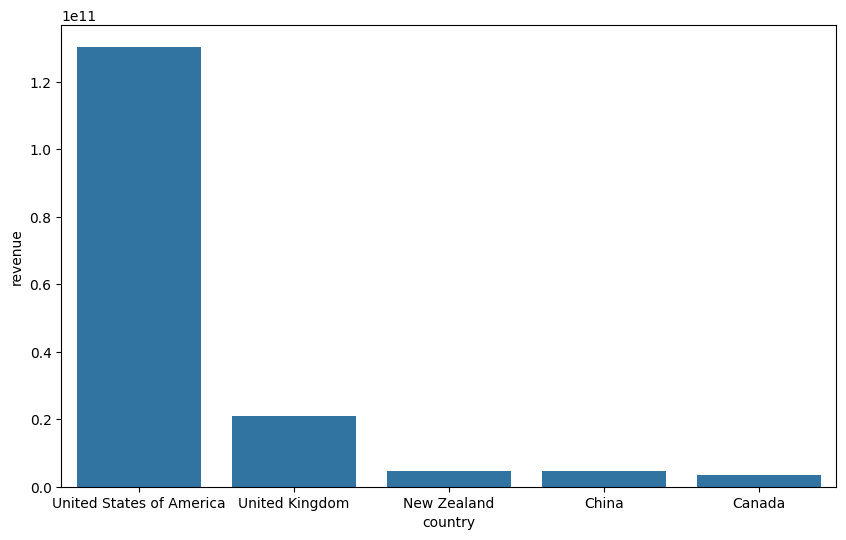

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_5_revenue, x="country", y="revenue")

### Budget dos filmes ao longo dos anos

In [110]:
yearly_budget = df[['release_date', 'budget']]
yearly_budget['year'] = df['release_date'].dt.year
yearly_budget = yearly_budget.groupby(["year"])["budget"].sum().reset_index()
yearly_budget.head()

/tmp/ipykernel_9856/2569910237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_budget['year'] = df['release_date'].dt.year


,year,budget
0,1933,187000
1,1938,1488423
2,1950,2900000
3,1953,0
4,1956,0


<Axes: xlabel='year', ylabel='budget'>

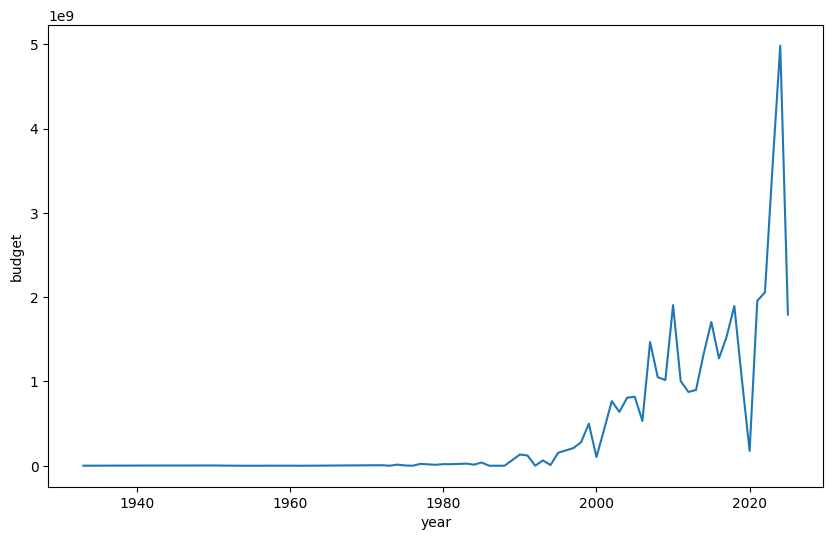

In [111]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_budget, x="year", y="budget")